In [1]:
import requests
from bs4 import BeautifulSoup as bs
import lxml
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
d = {}
i = 1
while True:
    payload = {'page':str(i),
               'sortby':'display_time descending',
               'isSearch':'true',
               'target':'all',
               'spell':'on',
               'Query':'Drug Trafficking'}
    htmlfile = requests.post('http://www.chicagotribune.com/search/dispatcher.front',params=payload)
    if not htmlfile.ok:
        break
    soup = bs(htmlfile.text,"lxml")
    title = soup.find_all('a', {'class':'trb_search_result_title'})
    for item in title:
        ans = re.findall('\d{8}',item['href'])
        if not ans:
            continue
        d[ans[0]]=d.get(ans[0],0)+1
    i=i+1
d

{'03040600': 1,
 '03172016': 1,
 '04020503': 1,
 '04030101': 1,
 '05082402': 1,
 '06040201': 1,
 '07012103': 1,
 '14807425': 1,
 '20081103': 1,
 '20090821': 1,
 '20100527': 1,
 '20100603': 1,
 '20100616': 1,
 '20100617': 1,
 '20100701': 1,
 '20100703': 1,
 '20100713': 1,
 '20100821': 1,
 '20100826': 1,
 '20100901': 1,
 '20100902': 1,
 '20101207': 1,
 '20110224': 1,
 '20110426': 1,
 '20110427': 1,
 '20110502': 1,
 '20110505': 1,
 '20110509': 1,
 '20110518': 1,
 '20110610': 1,
 '20110612': 2,
 '20110617': 2,
 '20110621': 1,
 '20110622': 1,
 '20110624': 1,
 '20110628': 1,
 '20110701': 1,
 '20110702': 1,
 '20110707': 1,
 '20110710': 1,
 '20110712': 2,
 '20110717': 1,
 '20110721': 1,
 '20110726': 1,
 '20110728': 1,
 '20110801': 1,
 '20110802': 1,
 '20110805': 1,
 '20110806': 1,
 '20110808': 1,
 '20110812': 1,
 '20110814': 1,
 '20110816': 2,
 '20110817': 1,
 '20110818': 1,
 '20110819': 1,
 '20110823': 2,
 '20110826': 1,
 '20110828': 1,
 '20110830': 1,
 '20110902': 1,
 '20110908': 1,
 '201109

In [3]:
list_temp = list(map(lambda x: (int(x[0][:4]),int(x[0][4:6]),int(x[0][6:]),x[1]),list(d.items())))

In [4]:
data = pd.DataFrame(list_temp, columns=['Year','Month','Day','Count'])
len(data)

971

In [5]:
data = data[data['Year']>2000]
len(data)

963

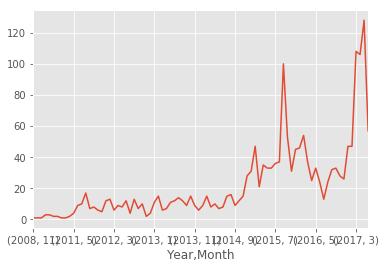

In [6]:
data.groupby(['Year','Month']).sum()['Count'].plot()